# Analisis Data Mining: Klasifikasi Kanker Payudara dengan Dataset WDBC

Apa itu Dataset WDBC?
WDBC adalah dataset yang berisi data diagnosis kanker payudara berdasarkan hasil pemeriksaan mikroskopis sel-sel yang diambil dari jaringan payudara.

  Sumber Data  
- Donor: Dr. William H. Wolberg (University of Wisconsin)
- Tanggal: November 1995
- Sumber: UCI Machine Learning Repository
- Link: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Cara Pengambilan Data  
Data diperoleh dari Fine Needle Aspirate (FNA) - yaitu:  
- Mengambil sampel jaringan payudara dengan jarum halus
- Sampel kemudian diperiksa di bawah mikroskop
- Gambar digital dari sel-sel tersebut dianalisis
- Karakteristik sel diukur dan dihitung secara otomatis

## 1. Data Understanding

Pada tahap ini, kita akan:
- Membaca dataset WDBC ke dalam DataFrame.
- Melihat struktur data (jumlah baris, kolom, tipe data).
- Menampilkan beberapa baris pertama data.
- Melihat statistik deskriptif untuk fitur numerik.
- Mengecek distribusi label diagnosis (benign/malignant).
- Mengecek apakah ada data yang hilang (missing values).

Langkah ini penting untuk memastikan data yang akan dianalisis sudah benar dan siap untuk tahap selanjutnya.

In [34]:
# Import library yang diperlukan
import pandas as pd

# Membaca data
column_names = [
    'ID', 'Diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]
df = pd.read_csv('wdbc.data', header=None, names=column_names)

# Melihat 5 baris pertama
display(df.head())

# Melihat info struktur data
df.info()

# Statistik deskriptif fitur numerik
df.describe()

# Distribusi label diagnosis
print(df['Diagnosis'].value_counts())
print(df['Diagnosis'].value_counts(normalize=True) * 100)

# Mengecek missing values
print('Jumlah missing values per kolom:')
print(df.isnull().sum())

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Distribusi

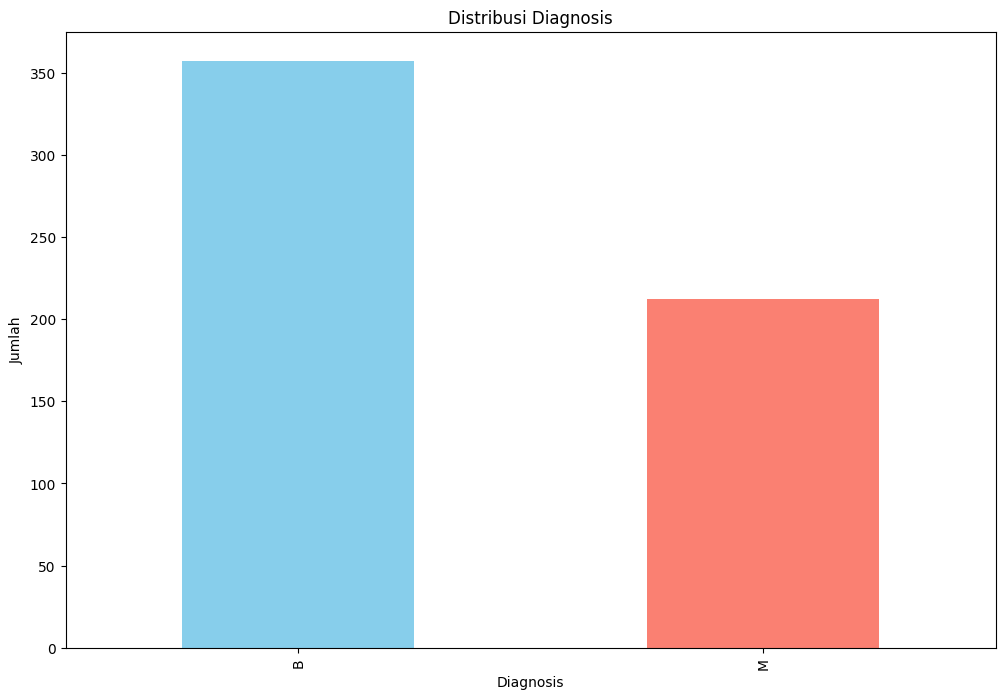

In [35]:
import matplotlib.pyplot as plt

df['Diagnosis'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Jumlah')
plt.show()

## 2. Pre Processing Data

Langkah Preprocessing untuk Dataset WDBC

### 2.1 Cek Missing Values

In [36]:
# ========================================
# CEK MISSING VALUES
# ========================================
print("=== CEK MISSING VALUES ===")

# Cek missing values per kolom
missing_values = df.isnull().sum()
print("Missing values per kolom:")
print(missing_values)

# Total missing values
total_missing = missing_values.sum()
print(f"\nTotal missing values: {total_missing}")

if total_missing == 0:
    print("✓ Dataset tidak memiliki missing values")
else:
    print("⚠️ Dataset memiliki missing values yang perlu ditangani")
    
    # Visualisasi missing values
    plt.figure(figsize=(12, 6))
    missing_values[missing_values > 0].plot(kind='bar', color='red')
    plt.title('Missing Values per Kolom')
    plt.xlabel('Kolom')
    plt.ylabel('Jumlah Missing Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

=== CEK MISSING VALUES ===
Missing values per kolom:
ID                         0
Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Total

### 2.2 Deteksi Outlier

In [37]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [38]:
# ========================================
# STATISTIK DESKRIPTIF UNTUK DETEKSI OUTLIER
# ========================================
print("=== STATISTIK DESKRIPTIF ===")

# Ambil kolom numerik (exclude ID)
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop('ID')

print("Statistik deskriptif untuk fitur numerik:")
print(df[numeric_columns].describe())

# Cek range nilai untuk setiap fitur
print("\nRange nilai per fitur:")
for col in numeric_columns:
    min_val = df[col].min()
    max_val = df[col].max()
    range_val = max_val - min_val
    print(f"{col}: {min_val:.4f} - {max_val:.4f} (range: {range_val:.4f})")

=== STATISTIK DESKRIPTIF ===
Statistik deskriptif untuk fitur numerik:
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052

In [39]:
# ========================================
# DETEKSI DAN HAPUS OUTLIERS
# ========================================
print("=== DETEKSI DAN HAPUS OUTLIERS ===")

def detect_and_remove_outliers(df, columns, method='iqr'):
    """
    Deteksi dan hapus outliers menggunakan IQR method
    """
    df_clean = df.copy()
    total_removed = 0
    
    for col in columns:
        if method == 'iqr':
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Hitung jumlah outliers
            outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
            outlier_count = len(outliers)
            
            if outlier_count > 0:
                print(f"{col}: {outlier_count} outliers")
                # Hapus outliers
                df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
                total_removed += outlier_count
            else:
                print(f"{col}: ✓ Tidak ada outliers")
    
    return df_clean, total_removed

# Deteksi dan hapus outliers
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop('ID')

print("Deteksi outliers per kolom:")
df_clean, total_removed = detect_and_remove_outliers(df, numeric_columns, method='iqr')

print(f"\nTotal outliers yang dihapus: {total_removed}")
print(f"Data sebelum: {len(df)} baris")
print(f"Data setelah: {len(df_clean)} baris")
print(f"Persentase data yang dihapus: {(total_removed/len(df)*100):.2f}%")

# Simpan data bersih
df_clean.to_csv('wdbc_clean_no_outliers.csv', index=False)
print("✓ Data bersih disimpan sebagai 'wdbc_clean_no_outliers.csv'")

=== DETEKSI DAN HAPUS OUTLIERS ===
Deteksi outliers per kolom:
radius_mean: 14 outliers
texture_mean: 7 outliers
perimeter_mean: 2 outliers
area_mean: 33 outliers
smoothness_mean: 6 outliers
compactness_mean: 15 outliers
concavity_mean: 13 outliers
concave_points_mean: 3 outliers
symmetry_mean: 8 outliers
fractal_dimension_mean: 10 outliers
radius_se: 23 outliers
texture_se: 14 outliers
perimeter_se: 10 outliers
area_se: 23 outliers
smoothness_se: 15 outliers
compactness_se: 14 outliers
concavity_se: 6 outliers
concave_points_se: 3 outliers
symmetry_se: 15 outliers
fractal_dimension_se: 7 outliers
radius_worst: 6 outliers
texture_worst: ✓ Tidak ada outliers
perimeter_worst: 2 outliers
area_worst: 11 outliers
smoothness_worst: 3 outliers
compactness_worst: 17 outliers
concavity_worst: 5 outliers
concave_points_worst: 1 outliers
symmetry_worst: 1 outliers
fractal_dimension_worst: 5 outliers

Total outliers yang dihapus: 292
Data sebelum: 569 baris
Data setelah: 277 baris
Persentase data 

### 2.4 Encoding Target
- Mengubah label kategorikal (B/M) menjadi numerik (0/1)
- B (Benign) = 0
- M (Malignant) = 1

In [40]:
df = df_clean

# 1. Persiapan Data
X = df.drop(['ID', 'Diagnosis'], axis=1)
y = df['Diagnosis']

In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"Target encoded: {le.classes_} -> {le.transform(le.classes_)}")
print(f"B (Benign) -> {le.transform(['B'])[0]}")
print(f"M (Malignant) -> {le.transform(['M'])[0]}")

Target encoded: ['B' 'M'] -> [0 1]
B (Benign) -> 0
M (Malignant) -> 1


### 2.5 Split Data
- Membagi data menjadi training set (80%) dan test set (20%)
- Menggunakan stratify untuk menjaga proporsi kelas
- random_state=42 untuk hasil yang konsisten

In [42]:
from sklearn.model_selection import train_test_split

# Split data 80% training, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Distribusi target training: {np.bincount(y_train)}")
print(f"Distribusi target test: {np.bincount(y_test)}")

Training set: (221, 30)
Test set: (56, 30)
Distribusi target training: [203  18]
Distribusi target test: [52  4]


### 2.6 Feature Scaling
- Menstandarisasi fitur numerik menggunakan StandardScaler
- Mengubah semua fitur ke skala yang sama (mean=0, std=1)
- Penting untuk algoritma yang sensitif terhadap skala data

In [43]:
from sklearn.preprocessing import StandardScaler

# Scaling fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data telah di-scale menggunakan StandardScaler")
print(f"Training set scaled shape: {X_train_scaled.shape}")
print(f"Test set scaled shape: {X_test_scaled.shape}")

Data telah di-scale menggunakan StandardScaler
Training set scaled shape: (221, 30)
Test set scaled shape: (56, 30)


## 3. Data Modeling

In [44]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("✓ Library berhasil diimport")

✓ Library berhasil diimport


Load Data

In [45]:
# Load data bersih yang sudah dihapus outliers
try:
    df = pd.read_csv('wdbc_clean_no_outliers.csv')
    print("✓ Data bersih berhasil dimuat")
except FileNotFoundError:
    print("⚠️ File 'wdbc_clean_no_outliers.csv' tidak ditemukan")
    print("Menggunakan data asli...")
    # Load data asli jika file bersih tidak ada
    column_names = [
        'ID', 'Diagnosis',
        'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
        'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
        'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
        'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
        'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
    ]
    df = pd.read_csv('wdbc.data', header=None, names=column_names)

print(f"Shape data: {df.shape}")
print(f"Jumlah sampel: {len(df)}")

✓ Data bersih berhasil dimuat
Shape data: (277, 32)
Jumlah sampel: 277


In [46]:
# ========================================
# PREPROCESSING DATA
# ========================================
print("=== PREPROCESSING DATA ===")

# 1. Persiapan Data
X = df.drop(['ID', 'Diagnosis'], axis=1)
y = df['Diagnosis']

print(f"Shape X (features): {X.shape}")
print(f"Shape y (target): {y.shape}")

# 2. Encoding Target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"Target encoded: {le.classes_} -> {le.transform(le.classes_)}")
print(f"B (Benign) -> {le.transform(['B'])[0]}")
print(f"M (Malignant) -> {le.transform(['M'])[0]}")

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Distribusi target training: {np.bincount(y_train)}")
print(f"Distribusi target test: {np.bincount(y_test)}")

# 4. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Data telah di-scale menggunakan StandardScaler")
print(f"Training set scaled shape: {X_train_scaled.shape}")
print(f"Test set scaled shape: {X_test_scaled.shape}")

# Verifikasi scaling
print(f"\nStatistik training set setelah scaling:")
print(f"Mean: {X_train_scaled.mean():.6f}")
print(f"Std: {X_train_scaled.std():.6f}")

=== PREPROCESSING DATA ===
Shape X (features): (277, 30)
Shape y (target): (277,)
Target encoded: ['B' 'M'] -> [0 1]
B (Benign) -> 0
M (Malignant) -> 1

Training set: (221, 30)
Test set: (56, 30)
Distribusi target training: [203  18]
Distribusi target test: [52  4]

✓ Data telah di-scale menggunakan StandardScaler
Training set scaled shape: (221, 30)
Test set scaled shape: (56, 30)

Statistik training set setelah scaling:
Mean: -0.000000
Std: 1.000000


### Random Forest

=== MODEL 1: RANDOM FOREST ===
Training Random Forest...

 HASIL EVALUASI RANDOM FOREST:
Accuracy: 0.9464
Precision: 0.6667
Recall: 0.5000
F1-Score: 0.5714
CV Accuracy: 0.9320 (+/- 0.0646)

📋 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

      Benign       0.96      0.98      0.97        52
   Malignant       0.67      0.50      0.57         4

    accuracy                           0.95        56
   macro avg       0.81      0.74      0.77        56
weighted avg       0.94      0.95      0.94        56


 CONFUSION MATRIX:
[[51  1]
 [ 2  2]]

 TOP 10 FEATURE IMPORTANCE:
                 feature  importance
23            area_worst    0.102066
27  concave_points_worst    0.080709
13               area_se    0.077496
20          radius_worst    0.062680
26       concavity_worst    0.062150
22       perimeter_worst    0.057404
1           texture_mean    0.051270
6         concavity_mean    0.050847
25     compactness_worst    0.041930
21         texture_w

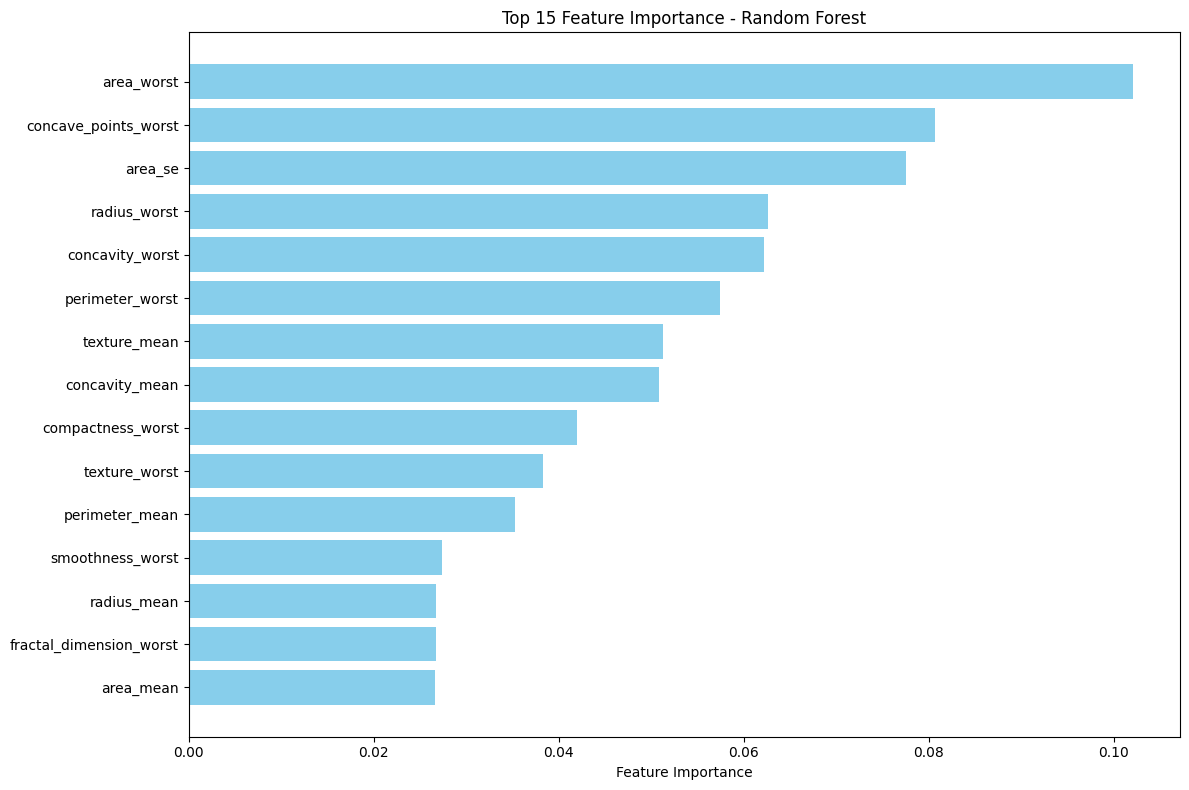

✓ Random Forest selesai!


In [47]:
# ========================================
# MODEL 1: RANDOM FOREST
# ========================================
print("=== MODEL 1: RANDOM FOREST ===")

# Inisialisasi model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training model
print("Training Random Forest...")
rf_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Cross validation
cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_mean_rf = cv_scores_rf.mean()
cv_std_rf = cv_scores_rf.std()

# Tampilkan hasil
print(f"\n HASIL EVALUASI RANDOM FOREST:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"CV Accuracy: {cv_mean_rf:.4f} (+/- {cv_std_rf*2:.4f})")

# Classification report
print(f"\n📋 CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_rf, target_names=['Benign', 'Malignant']))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(f"\n CONFUSION MATRIX:")
print(cm_rf)

# Feature Importance
feature_importance_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n TOP 10 FEATURE IMPORTANCE:")
print(feature_importance_rf.head(10))

# Visualisasi feature importance
plt.figure(figsize=(12, 8))
top_features_rf = feature_importance_rf.head(15)
plt.barh(range(len(top_features_rf)), top_features_rf['importance'], color='skyblue')
plt.yticks(range(len(top_features_rf)), top_features_rf['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("✓ Random Forest selesai!")

### Logistic Regression

=== MODEL 2: LOGISTIC REGRESSION ===
Training Logistic Regression...

 HASIL EVALUASI LOGISTIC REGRESSION:
Accuracy: 0.9464
Precision: 0.6667
Recall: 0.5000
F1-Score: 0.5714
CV Accuracy: 0.9503 (+/- 0.0441)

 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

      Benign       0.96      0.98      0.97        52
   Malignant       0.67      0.50      0.57         4

    accuracy                           0.95        56
   macro avg       0.81      0.74      0.77        56
weighted avg       0.94      0.95      0.94        56


 CONFUSION MATRIX:
[[51  1]
 [ 2  2]]

 TOP 10 FEATURE COEFFICIENTS:
                 feature  coefficient
15        compactness_se    -1.178703
21         texture_worst     0.893433
5       compactness_mean    -0.883786
26       concavity_worst     0.826948
13               area_se     0.763825
1           texture_mean     0.713622
28        symmetry_worst     0.711249
27  concave_points_worst     0.684223
10             radius_se     

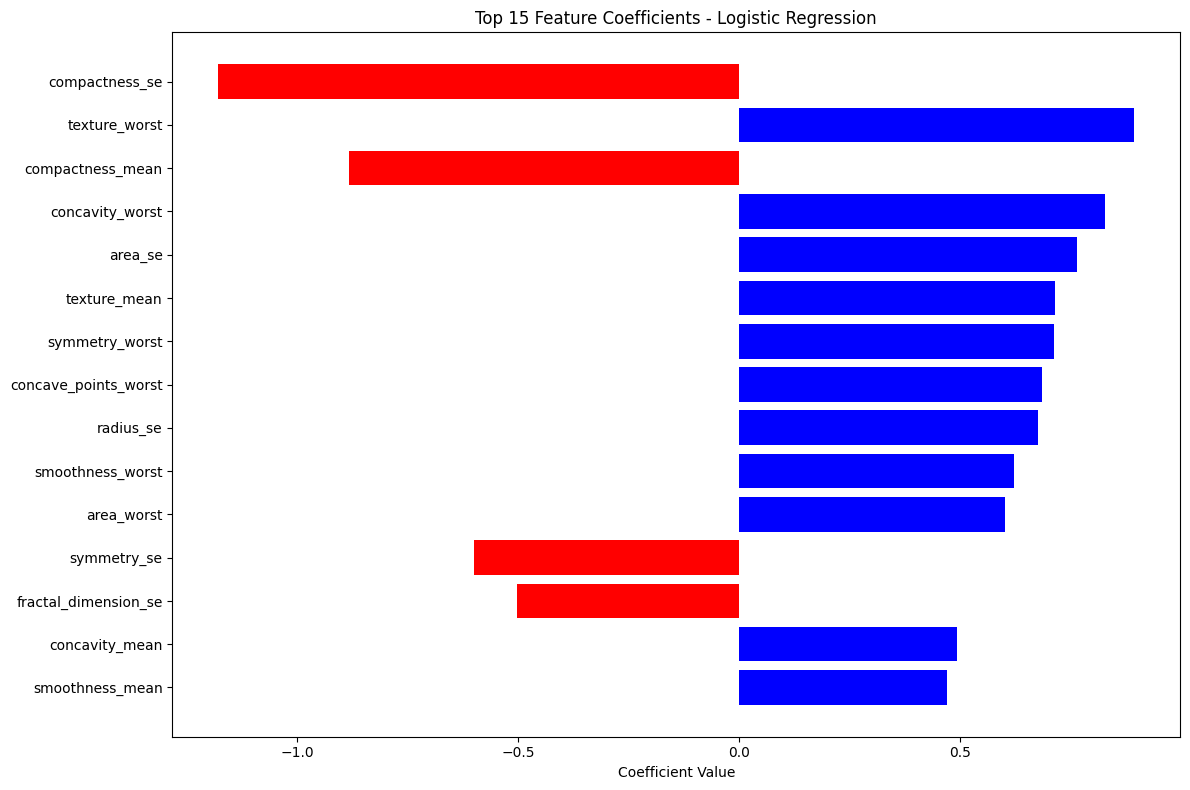

✓ Logistic Regression selesai!


In [48]:
# ========================================
# MODEL 2: LOGISTIC REGRESSION
# ========================================
print("=== MODEL 2: LOGISTIC REGRESSION ===")

# Inisialisasi model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Training model
print("Training Logistic Regression...")
lr_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluasi
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Cross validation
cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_mean_lr = cv_scores_lr.mean()
cv_std_lr = cv_scores_lr.std()

# Tampilkan hasil
print(f"\n HASIL EVALUASI LOGISTIC REGRESSION:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")
print(f"CV Accuracy: {cv_mean_lr:.4f} (+/- {cv_std_lr*2:.4f})")

# Classification report
print(f"\n CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_lr, target_names=['Benign', 'Malignant']))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(f"\n CONFUSION MATRIX:")
print(cm_lr)

# Coefficients (feature importance untuk logistic regression)
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr_model.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)

print(f"\n TOP 10 FEATURE COEFFICIENTS:")
print(coef_df.head(10))

# Visualisasi coefficients
plt.figure(figsize=(12, 8))
top_coef = coef_df.head(15)
colors = ['red' if x < 0 else 'blue' for x in top_coef['coefficient']]
plt.barh(range(len(top_coef)), top_coef['coefficient'], color=colors)
plt.yticks(range(len(top_coef)), top_coef['feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 15 Feature Coefficients - Logistic Regression')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("✓ Logistic Regression selesai!")

### Support Vector Machine

In [49]:
# ========================================
# MODEL 3: SUPPORT VECTOR MACHINE (SVM)
# ========================================
print("=== MODEL 3: SUPPORT VECTOR MACHINE ===")

# Inisialisasi model
svm_model = SVC(random_state=42, probability=True)

# Training model
print("Training Support Vector Machine...")
svm_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Cross validation
cv_scores_svm = cross_val_score(svm_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_mean_svm = cv_scores_svm.mean()
cv_std_svm = cv_scores_svm.std()

# Tampilkan hasil
print(f"\n HASIL EVALUASI SUPPORT VECTOR MACHINE:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")
print(f"CV Accuracy: {cv_mean_svm:.4f} (+/- {cv_std_svm*2:.4f})")

# Classification report
print(f"\n CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_svm, target_names=['Benign', 'Malignant']))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(f"\n CONFUSION MATRIX:")
print(cm_svm)

print("✓ Support Vector Machine selesai!")

=== MODEL 3: SUPPORT VECTOR MACHINE ===
Training Support Vector Machine...

 HASIL EVALUASI SUPPORT VECTOR MACHINE:
Accuracy: 0.9821
Precision: 0.8000
Recall: 1.0000
F1-Score: 0.8889
CV Accuracy: 0.9502 (+/- 0.0341)

 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

      Benign       1.00      0.98      0.99        52
   Malignant       0.80      1.00      0.89         4

    accuracy                           0.98        56
   macro avg       0.90      0.99      0.94        56
weighted avg       0.99      0.98      0.98        56


 CONFUSION MATRIX:
[[51  1]
 [ 0  4]]
✓ Support Vector Machine selesai!


### Perbandingan Model

In [50]:
# ========================================
# SIMPAN BEST MODEL
# ========================================
print("=== SIMPAN BEST MODEL ===")

import joblib
import os

# Buat folder models jika belum ada
if not os.path.exists('models'):
    os.makedirs('models')
    print("✓ Folder 'models' berhasil dibuat")

# Tentukan model terbaik berdasarkan F1-Score
best_model_idx = comparison_df['F1-Score'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']

# Pilih model yang akan disimpan
if best_model_name == 'Random Forest':
    best_model = rf_model
    print("✓ Random Forest dipilih sebagai model terbaik")
elif best_model_name == 'Logistic Regression':
    best_model = lr_model
    print("✓ Logistic Regression dipilih sebagai model terbaik")
else:
    best_model = svm_model
    print("✓ Support Vector Machine dipilih sebagai model terbaik")

# Simpan model
model_filename = f'models/best_model_{best_model_name.replace(" ", "_").lower()}.pkl'
joblib.dump(best_model, model_filename)
print(f"✓ Model tersimpan sebagai: {model_filename}")

# Simpan scaler
scaler_filename = 'models/scaler.pkl'
joblib.dump(scaler, scaler_filename)
print(f"✓ Scaler tersimpan sebagai: {scaler_filename}")

# Simpan label encoder
encoder_filename = 'models/label_encoder.pkl'
joblib.dump(le, encoder_filename)
print(f"✓ Label encoder tersimpan sebagai: {encoder_filename}")

# Simpan informasi model
model_info = {
    'best_model_name': best_model_name,
    'best_f1_score': best_f1_score,
    'best_accuracy': best_accuracy,
    'best_precision': best_precision,
    'best_recall': best_recall,
    'feature_names': list(X.columns),
    'model_filename': model_filename,
    'scaler_filename': scaler_filename,
    'encoder_filename': encoder_filename
}

import json
with open('models/model_info.json', 'w') as f:
    json.dump(model_info, f, indent=4)
print("✓ Informasi model tersimpan sebagai: models/model_info.json")

# Verifikasi file tersimpan
print(f"\n FILES YANG TERSIMPAN:")
print(f"1. {model_filename}")
print(f"2. {scaler_filename}")
print(f"3. {encoder_filename}")
print(f"4. models/model_info.json")

# Cek ukuran file
import os
for filename in [model_filename, scaler_filename, encoder_filename]:
    size = os.path.getsize(filename) / 1024  # dalam KB
    print(f"   {os.path.basename(filename)}: {size:.2f} KB")

print(f"\n BEST MODEL BERHASIL DISIMPAN!")
print(f"Model {best_model_name} siap digunakan untuk deployment.")

=== SIMPAN BEST MODEL ===
✓ Support Vector Machine dipilih sebagai model terbaik
✓ Model tersimpan sebagai: models/best_model_support_vector_machine.pkl
✓ Scaler tersimpan sebagai: models/scaler.pkl
✓ Label encoder tersimpan sebagai: models/label_encoder.pkl
✓ Informasi model tersimpan sebagai: models/model_info.json

 FILES YANG TERSIMPAN:
1. models/best_model_support_vector_machine.pkl
2. models/scaler.pkl
3. models/label_encoder.pkl
4. models/model_info.json
   best_model_support_vector_machine.pkl: 17.64 KB
   scaler.pkl: 2.21 KB
   label_encoder.pkl: 0.52 KB

 BEST MODEL BERHASIL DISIMPAN!
Model Support Vector Machine siap digunakan untuk deployment.
